In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

# <span style="color:orange"> Numerical Simulation Laboratory: Lecture 12</span>

## Load test figures

In [2]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [4]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

## Exercise 12.1
We will create three neurale networks able to distinguish between digits and train them with the samples loaded above. The three networks will differ in the optimizing algorithm for they will respectively employ:
1. Stocastic Gradient Descend
2. Adam
3. Root Mean Square Prop

and they will share all the other features (in particular they will have two Dense layer with <code>relu</code> activation function, one Dropout and another Dense with <code>soft</code> activation; the loss function is categorial crossentropy).
### Stocastic Gradient Descend

In [5]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7280 - accuracy: 0.7886 - val_loss: 0.3029 - val_accuracy: 0.9175
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3727 - accuracy: 0.8942 - val_loss: 0.2341 - val_accuracy: 0.9322
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3016 - accuracy: 0.9160 - val_loss: 0.1968 - val_accuracy: 0.9422
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2597 - accuracy: 0.9277 - val_loss: 0.1723 - val_accuracy: 0.9476
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2301 - accuracy: 0.9352 - val_loss: 0.1572 - val_accuracy: 0.9503


313/313 [==============================] - 1s 3ms/step - loss: 0.1572 - accuracy: 0.9503

Optimizer: Stocastic Gradient Descend

Test loss: 0.15717342495918274
Test accuracy: 0.9502999782562256


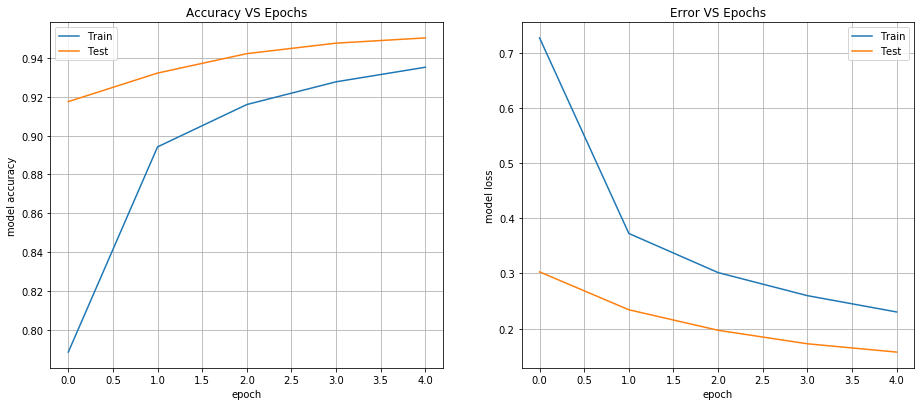

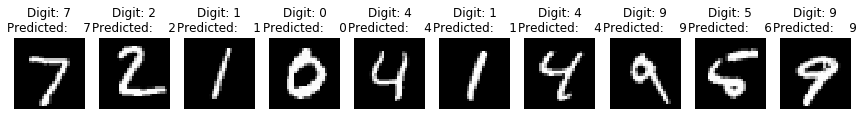

In [6]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print("Optimizer: Stocastic Gradient Descend")
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
f, canvas=plt.subplots(nrows=1, ncols=2)

# summarize history for accuracy
canvas[0].plot(history.history['accuracy'])
canvas[0].plot(history.history['val_accuracy'])
canvas[0].set_title("Accuracy VS Epochs")
canvas[0].set_ylabel('model accuracy')
canvas[0].set_xlabel('epoch')
canvas[0].legend(['Train', 'Test'], loc='best')
canvas[0].grid(True)

# summarize history for loss
canvas[1].plot(history.history['loss'])
canvas[1].plot(history.history['val_loss'])
canvas[1].set_title("Error VS Epochs")
canvas[1].set_ylabel('model loss')
canvas[1].set_xlabel('epoch')
canvas[1].legend(['Train', 'Test'], loc='best')
canvas[1].grid(True)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.2, wspace=0.2, hspace=0.4)

predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Adam

In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2832 - accuracy: 0.9172 - val_loss: 0.1060 - val_accuracy: 0.9684
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1199 - accuracy: 0.9660 - val_loss: 0.0933 - val_accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0877 - accuracy: 0.9743 - val_loss: 0.0764 - val_accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0689 - accuracy: 0.9797 - val_loss: 0.0735 - val_accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0578 - accuracy: 0.9824 - val_loss: 0.0791 - val_accuracy: 0.9786


313/313 [==============================] - 1s 4ms/step - loss: 0.0791 - accuracy: 0.9786

Optimizer: Adam

Test loss: 0.0790596604347229
Test accuracy: 0.978600025177002


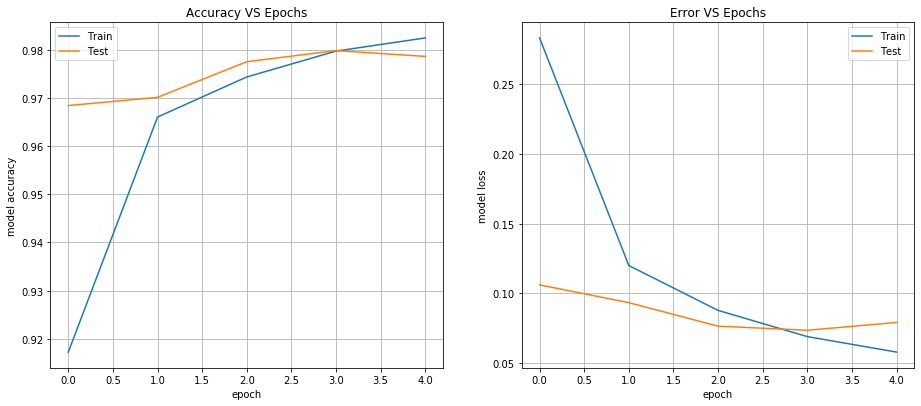

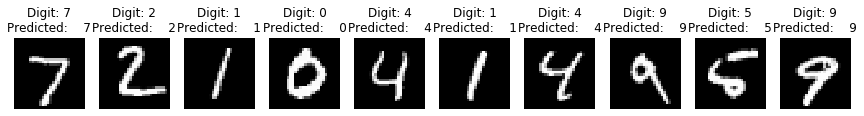

In [8]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print("Optimizer: Adam")
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
f, canvas=plt.subplots(nrows=1, ncols=2)

# summarize history for accuracy
canvas[0].plot(history.history['accuracy'])
canvas[0].plot(history.history['val_accuracy'])
canvas[0].set_title("Accuracy VS Epochs")
canvas[0].set_ylabel('model accuracy')
canvas[0].set_xlabel('epoch')
canvas[0].legend(['Train', 'Test'], loc='best')
canvas[0].grid(True)

# summarize history for loss
canvas[1].plot(history.history['loss'])
canvas[1].plot(history.history['val_loss'])
canvas[1].set_ylabel('model loss')
canvas[1].set_xlabel('epoch')
canvas[1].set_title("Error VS Epochs")
canvas[1].legend(['Train', 'Test'], loc='best')
canvas[1].grid(True)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.2, wspace=0.2, hspace=0.4)

predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### RMSprop

In [9]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2759 - accuracy: 0.9199 - val_loss: 0.1251 - val_accuracy: 0.9648
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1466 - accuracy: 0.9630 - val_loss: 0.1296 - val_accuracy: 0.9690
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1424 - accuracy: 0.9688 - val_loss: 0.1235 - val_accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1403 - accuracy: 0.9717 - val_loss: 0.1353 - val_accuracy: 0.9749
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1415 - accuracy: 0.9720 - val_loss: 0.1615 - val_accuracy: 0.9728


313/313 [==============================] - 1s 4ms/step - loss: 0.1615 - accuracy: 0.9728

Optimizer: RMSProp

Test loss: 0.16145703196525574
Test accuracy: 0.9728000164031982


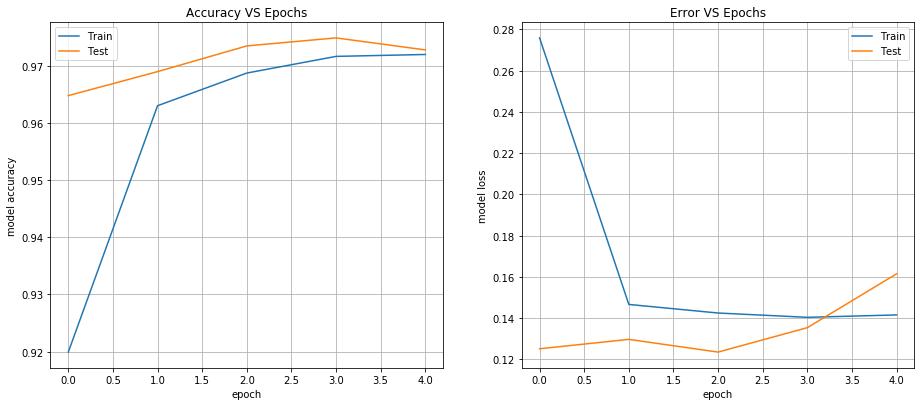

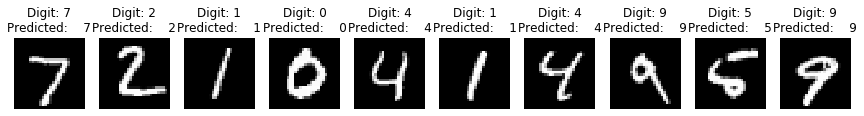

In [10]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print("Optimizer: RMSProp")
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
f, canvas=plt.subplots(nrows=1, ncols=2)

# summarize history for accuracy
canvas[0].plot(history.history['accuracy'])
canvas[0].plot(history.history['val_accuracy'])
canvas[0].set_ylabel('model accuracy')
canvas[0].set_xlabel('epoch')
canvas[0].set_title("Accuracy VS Epochs")
canvas[0].legend(['Train', 'Test'], loc='best')
canvas[0].grid(True)

# summarize history for loss
canvas[1].plot(history.history['loss'])
canvas[1].plot(history.history['val_loss'])
canvas[1].set_ylabel('model loss')
canvas[1].set_xlabel('epoch')
canvas[1].set_title("Error VS Epochs")
canvas[1].legend(['Train', 'Test'], loc='best')
canvas[1].grid(True)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.2, wspace=0.2, hspace=0.4)

predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Based on the accurancy and the loss function, the optmizing algorithm that guarantees the best performances (among the three we have considered) is Adam, which shows both highest accurancy and lowest error.

As for the tests, the only networks that fails at one of them is the SDG one (misses the $9$-th picture, predicts it is a $6$ while it is actually a $5$). The handwriting of that particular digit is, however, quite weird with an abrupt disruption between the horizontal and vertical lines and the cove-shaped stroke is barely hinted at.

## Exercise 12.2: CNN architecture
We now build a further neural network with the same aim as the ones before but this time we are going to use convolutional and pooling layers. The optimizer is Stocastic Gradient Descend and the loss function is yet again categorical entropy.

In [11]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [12]:
def create_CNN():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(4, 4), strides=None, padding="valid"))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(rate=.2))
    model.add(Conv2D(15, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.9039 - accuracy: 0.7075 - val_loss: 0.2946 - val_accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2768 - accuracy: 0.9159 - val_loss: 0.1748 - val_accuracy: 0.9465
Epoch 3/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1839 - accuracy: 0.9444 - val_loss: 0.1150 - val_accuracy: 0.9647
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1451 - accuracy: 0.9552 - val_loss: 0.0902 - val_accuracy: 0.9739
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0773 - accuracy: 0.9780


Test loss: 0.07726364582777023
Test accuracy: 0.9779999852180481


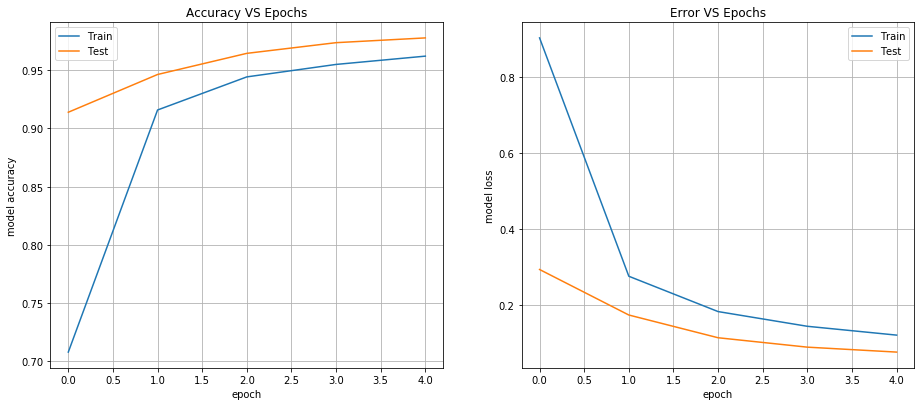

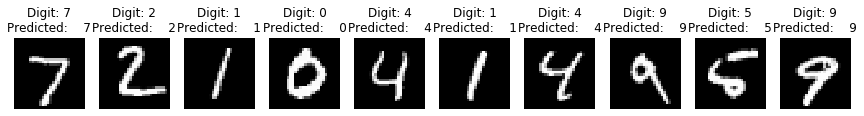

In [13]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
f, canvas=plt.subplots(nrows=1, ncols=2)

# summarize history for accuracy
canvas[0].plot(history.history['accuracy'])
canvas[0].plot(history.history['val_accuracy'])
canvas[0].set_ylabel('model accuracy')
canvas[0].set_xlabel('epoch')
canvas[0].set_title("Accuracy VS Epochs")
canvas[0].legend(['Train', 'Test'], loc='best')
canvas[0].grid(True)

# summarize history for loss
canvas[1].plot(history.history['loss'])
canvas[1].plot(history.history['val_loss'])
canvas[1].set_ylabel('model loss')
canvas[1].set_xlabel('epoch')
canvas[1].set_title("Error VS Epochs")
canvas[1].legend(['Train', 'Test'], loc='best')
canvas[1].grid(True)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.2, wspace=0.2, hspace=0.4)

predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Accuracy and error of the convolutional neural network are very close to those of the best network from Ex 12.1 (the one with the Adam optimizer). Indeed, it passes the test by correctly predicting all the digits.
## Exercise 12.3
We will now feed the convolutional network with some brand new images we have created and test it on them (thus not taken from the downloaded sample as with the previous tests). We provide an image for each digit and see how many he can get right.

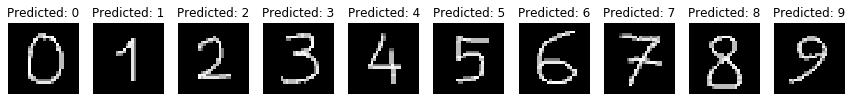

In [18]:
from PIL import Image

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    digit_in=Image.open("Es_lezione_12/" + str(i) + ".png").convert('L')
    ydim, xdim=digit_in.size
    pix=digit_in.load()
    data=np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=pix[j,k]
            
    data/=255
    plt.subplot(1, 10, i+1)
    plt.imshow(data, cmap='gray')
    data=data.reshape(1, xdim*ydim)
    
    if tf.keras.backend.image_data_format=='channels_first':
        data=data.reshape(data.shape[0], 1, img_rows, img_cols)
    else:
        data=data.reshape(data.shape[0], img_rows, img_cols, 1)
    predictions=model_CNN.predict(data)
    plt.title("Predicted: {}".format(np.argmax(predictions)))   
    plt.axis('off') 
plt.show()

The convolutional network proves to be quite well-trained and able to correctly label digits not taken from the starting sample. Some further challenges may come from feeding it with digits written for the most part in corners of the image (thus not well-centered). The ability to predict such images depends also on the training sample we have provided, so we could either enlarge it or change the architecture should it badly fail at it.